In [1]:
import numpy as np

import soss_read_refs
import soss_background

import matplotlib.pyplot as plt

plt.rc('figure', figsize=(13,8))
plt.rc('font', size=16)
plt.rc('image', cmap='inferno')
plt.rc('lines', lw=2)

In [2]:
ref_2d_profile = 'Generate_ref_files/SOSS_ref_2D_profile.fits'

In [3]:
reference = soss_read_refs.Ref2dProfile(ref_2d_profile)
ref_2d_profile = reference()

Generate some fake data from the 2d profile.

In [4]:
true_bkg = np.random.rand(2048)
scidata = ref_2d_profile + true_bkg
scimask = np.zeros_like(ref_2d_profile, dtype='bool')

Run the simple background subtraction.

In [5]:
scidata_bkg, col_bkg, npix_bkg = soss_background.soss_background(scidata, scimask, ref_2d_profile)

Compare the true and recovered background values.

Text(0, 0.5, 'Recovered Background')

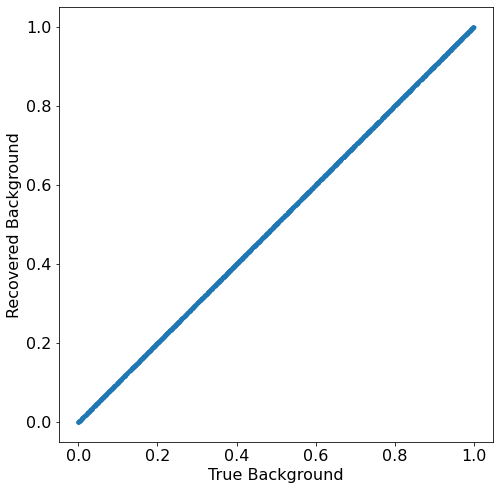

In [6]:
plt.subplot(111, aspect='equal')
plt.plot(true_bkg, col_bkg, '.')
plt.xlabel('True Background')
plt.ylabel('Recovered Background')

Compare the original and background subtracted data.

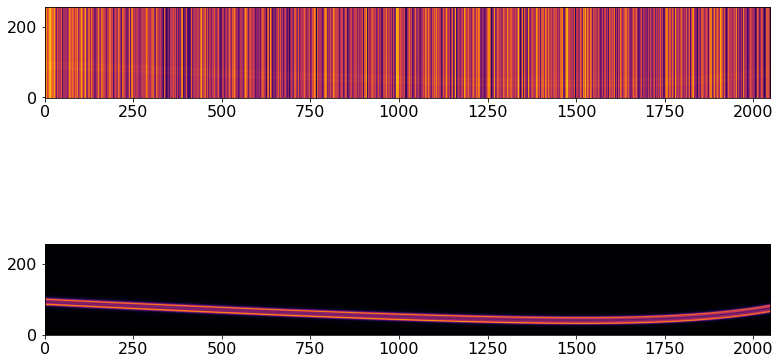

In [7]:
plt.subplot(211)
plt.imshow(scidata, origin='lower')

plt.subplot(212)
plt.imshow(scidata_bkg, origin='lower')